<a href="https://colab.research.google.com/github/yashwanth-kokkanti/kerasPractise/blob/main/earthQuakePredictionKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## This Notebook demonstrates Earth Quake prediction using using Keras

''' Predicting earthquakes is one of the great unsolved problems in the earth sciences.
With the increase in the use of technology, many seismic monitoring stations have increased, 
so we can use machine learning and other data-driven methods to predict earthquakes.

It is well known that if a disaster occurs in one region, it is likely to happen again. 
Some regions have frequent earthquakes, but this is only a comparative amount compared to other regions.

So, predicting the earthquake with date and time, latitude and longitude from previous data is not a trend that follows like other things, it happens naturally.

'''

' Predicting earthquakes is one of the great unsolved problems in the earth sciences.\nWith the increase in the use of technology, many seismic monitoring stations have increased, \nso we can use machine learning and other data-driven methods to predict earthquakes.\n\nIt is well known that if a disaster occurs in one region, it is likely to happen again. \nSome regions have frequent earthquakes, but this is only a comparative amount compared to other regions.\n\nSo, predicting the earthquake with date and time, latitude and longitude from previous data is not a trend that follows like other things, it happens naturally.\n\n'

In [2]:
## Let us start building our Model with Imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/database.csv")
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [4]:
## Among all above Fields  few are no use ful in prediction , like Depth, DepthError, Magnitude, MagnitudeType etc. 
## So Lets take few columns like latitide, longitude time etc to predict model 


data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [5]:
## Date and Time Format are required to be modified into unixtime frame

import datetime
import time

timestamp = []

for d, t in zip(data['Date'], data ['Time']):
  try:
    ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S') ## Combining Date Time and then formmating
    timestamp.append(time.mktime(ts.timetuple())) ## mktime converts into unixtime ## timetuple derives all compponents of time
  except ValueError:
    timestamp.append('ValueError') ## If time format is not good raise Error

timestamp = pd.Series(timestamp)  

## Create New Field Timestamp 

data['timestamp'] = timestamp.values

## Drop Date and time Columns 

final_data = data.drop(['Date', 'Time'], axis=1)

final_data = final_data[final_data != 'ValueError']

final_data.head()

,Latitude,Longitude,Depth,Magnitude,timestamp
0,19.246,145.616,131.6,6.0,-1.57631e+08
1,1.863,127.352,80.0,5.8,-1.57466e+08
2,-20.579,-173.972,20.0,6.2,-1.57356e+08
3,-59.076,-23.557,15.0,5.8,-1.57094e+08
4,11.938,126.427,15.0,5.8,-1.57026e+08


In [6]:
## Let us Visualize Data using MatplotLibs mpl_toolkit 

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
  Using cached https://github.com/matplotlib/basemap/archive/master.zip
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp36-cp36m-linux_x86_64.whl size=121757240 sha256=1569c212b08de56ad120e82e7be3b76e39816fb33c59726d1ea52082c371b436
  Stored in directory: /tmp/pip-ephem-wheel-cache-jgbtx9t8/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
Successfully built basemap


In [7]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

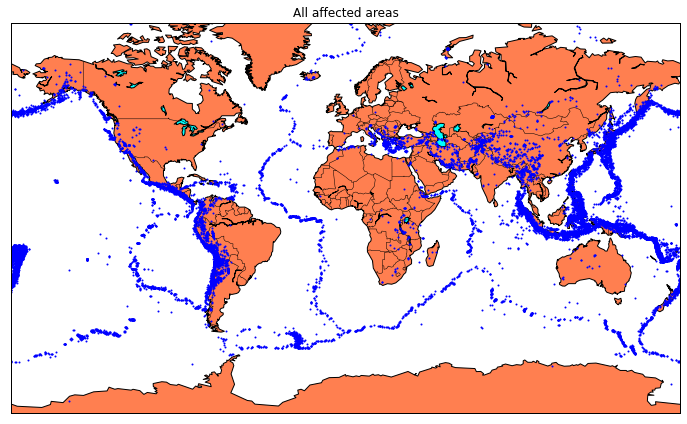

In [8]:
## Source: https://stackoverflow.com/questions/44488167/plotting-lat-long-points-using-basemap

m = Basemap(projection='mill', llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')


longitudes = data["Longitude"].tolist()
latitudes = data["Latitude"].tolist()

x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, ".", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [9]:
## Splitting the Dataset 

import sklearn 
X = final_data[['timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(18729, 3) (4683, 3) (18729, 2) (4683, 3)


In [10]:
## Neural Network 

from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer, loss):
  model = Sequential()
  model.add(Dense(neurons, activation=activation, input_shape=(3, )))
  model.add(Dense(neurons, activation=activation))
  
  model.add(Dense(2, activation='softmax'))
  model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

  return model

In [11]:
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, verbose=1)

#neurons = [16, 64, 128]
neurons = [16]
#batch_size = [10, 20, 50, 100]
batch_size = [10]
epochs = [10]
# activation = ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear', 'exponential']
activation = ['sigmoid', 'relu']
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
optimizer = [ 'SGD', 'Adadelta', 'Adam']
loss = ['squared_hinge']

param_grid = dict(neurons=neurons, batch_size=batch_size, epochs=epochs, activation=activation, optimizer=optimizer, loss=loss)


In [12]:
## Let us find the best model out of the above parameters 

from sklearn.model_selection import GridSearchCV
import numpy as np

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

X_train = np.array(X_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)


grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/10
1873/1873 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.0195
Epoch 2/10
1873/1873 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0176
Epoch 3/10
1873/1873 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0200
Epoch 4/10
1873/1873 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0181
Epoch 5/10
1873/1873 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0196
Epoch 6/10
1873/1873 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0197
Epoch 7/10
1873/1873 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0192
Epoch 8/10
1873/1873 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0210
Epoch 9/10
1873/1873 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0203
Epoch 10/10
1873/1873 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.0202
Best: 0.8

In [13]:
## Now let us take the best parameters train the model and then evaluate using Test Data 

X_test = np.array(X_test, dtype=np.float)
y_test = np.array(y_test, dtype=np.float)

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='SGD', loss='squared_hinge', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(X_test, y_test))

[test_loss, test_acc] = model.evaluate(X_test, y_test)

Epoch 1/10
1873/1873 [==============================] - 5s 3ms/step - loss: 0.4727 - accuracy: 0.8683 - val_loss: 0.0038 - val_accuracy: 0.9823
Epoch 2/10
1873/1873 [==============================] - 5s 3ms/step - loss: 0.0048 - accuracy: 0.9781 - val_loss: 0.0038 - val_accuracy: 0.9823
Epoch 3/10
1873/1873 [==============================] - 5s 3ms/step - loss: 0.0040 - accuracy: 0.9801 - val_loss: 0.0038 - val_accuracy: 0.9823
Epoch 4/10
1873/1873 [==============================] - 5s 3ms/step - loss: 0.0043 - accuracy: 0.9798 - val_loss: 0.0038 - val_accuracy: 0.9823
Epoch 5/10
1873/1873 [==============================] - 5s 3ms/step - loss: 0.0041 - accuracy: 0.9804 - val_loss: 0.0038 - val_accuracy: 0.9823
Epoch 6/10
1873/1873 [==============================] - 5s 3ms/step - loss: 0.0037 - accuracy: 0.9807 - val_loss: 0.0038 - val_accuracy: 0.9823
Epoch 7/10
1873/1873 [==============================] - 5s 3ms/step - loss: 0.0043 - accuracy: 0.9801 - val_loss: 0.0038 - val_accuracy:

In [14]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 0.003783485619351268, accuracy = 0.9822763204574585


In [15]:
## This is Fantastic . This si able to predict with 98% of accuracy which area is affected with EarthQuake or not. 